In [2]:
#connect google colab with google drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
#import the libraries to load dataset
import zipfile
import os

#opens file in readmode
zip_ref = zipfile.ZipFile('/content/gdrive/MyDrive/MajorProject/br35hdataset/train.zip')


#extracts the files into the /MajorProject folder
zip_ref.extractall('/content/gdrive/MyDrive/MajorProject/br35hdataset')

#close the file
zip_ref.close()

In [ ]:
#import the libraries to load dataset
import zipfile
import os

#opens file in readmode
zip_ref = zipfile.ZipFile('/content/gdrive/MyDrive/MajorProject/br35hdataset/validation.zip')

#extracts the files into the /MajorProject folder
zip_ref.extractall('/content/gdrive/MyDrive/MajorProject/br35hdataset')

#close the file
zip_ref.close()


In [ ]:
import os
import glob

folder_path = '/content/gdrive/MyDrive/MajorProject/br35hdataset/train'  # replace with the actual folder path

yes_path = os.path.join(folder_path, 'yes')
no_path = os.path.join(folder_path, 'no')

yes_count = len(glob.glob(os.path.join(yes_path, '*.jpg')))  # replace '*.jpg' with the actual file extension of your images
no_count = len(glob.glob(os.path.join(no_path, '*.jpg')))  # replace '*.jpg' with the actual file extension of your images

print(f'Total images in "yes" folder: {yes_count}')
print(f'Total images in "no" folder: {no_count}')
print(yes_count+no_count)


Total images in "yes" folder: 7180
Total images in "no" folder: 7220
14400


In [ ]:
#import the libraries to load dataset
import zipfile
import os

#opens file in readmode
zip_ref = zipfile.ZipFile('/content/gdrive/MyDrive/MajorProject/br35hdataset/test.zip')

#extracts the files into the /MajorProject folder
zip_ref.extractall('/content/gdrive/MyDrive/MajorProject/br35hdataset')

#close the file
zip_ref.close()

In [21]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
import cv2
import imutils
import numpy as np
import time
import sys
import math

In [ ]:
#initializing variables
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=30
n_classes = 2

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers

input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

train_data_dir = '/content/gdrive/MyDrive/MajorProject/br35hdataset/train'
validation_data_dir = '/content/gdrive/MyDrive/MajorProject/br35hdataset/validation'

train_datagen = ImageDataGenerator(
    rescale=1./255,    
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)




Found 14400 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.


In [ ]:
model = models.Sequential([

    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE,CHANNELS)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(rate=0.2),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(rate=0.2),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(rate=0.2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(rate=0.2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(rate=0.2),
    layers.Flatten(),
    layers.Dense(units = 128, activation='relu'), #128 neurons
    layers.Dense(2, activation='softmax'), #2 neurons
])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 64)        0

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    batch_size=BATCH_SIZE,
    validation_data=validation_generator,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/30
450/450 [==============================] - 129s 260ms/step - loss: 0.4948 - accuracy: 0.7619 - val_loss: 0.3982 - val_accuracy: 0.8156
Epoch 2/30
450/450 [==============================] - 104s 231ms/step - loss: 0.3296 - accuracy: 0.8597 - val_loss: 0.2470 - val_accuracy: 0.8978
Epoch 3/30
450/450 [==============================] - 103s 229ms/step - loss: 0.2244 - accuracy: 0.9146 - val_loss: 0.1644 - val_accuracy: 0.9439
Epoch 4/30
450/450 [==============================] - 103s 228ms/step - loss: 0.1411 - accuracy: 0.9449 - val_loss: 0.1373 - val_accuracy: 0.9522
Epoch 5/30
450/450 [==============================] - 100s 222ms/step - loss: 0.0893 - accuracy: 0.9688 - val_loss: 0.0817 - val_accuracy: 0.9711
Epoch 6/30
450/450 [==============================] - 104s 231ms/step - loss: 0.0713 - accuracy: 0.9763 - val_loss: 0.0864 - val_accuracy: 0.9778
Epoch 7/30
450/450 [==============================] - 101s 224ms/step - loss: 0.0679 - accuracy: 0.9767 - val_loss: 0.0587 -

In [3]:
from tensorflow.keras.models import load_model

# load the saved model
model = load_model('/content/gdrive/MyDrive/MajorProject/cnn-softmax-adam.h5')


In [ ]:
# evaluate the model on the test set
score = model.evaluate_generator(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

<ipython-input-19-2dded4200935>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator)


Test loss: 0.07047320157289505
Test accuracy: 0.9816666841506958


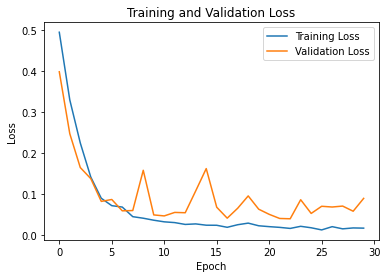

In [ ]:
import matplotlib.pyplot as plt
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

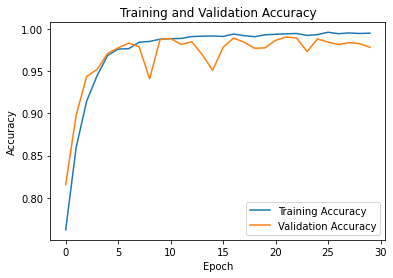

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

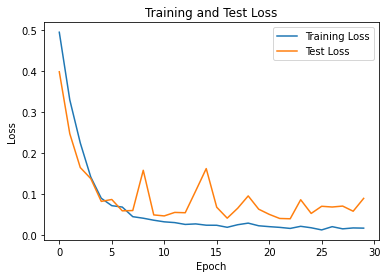

In [ ]:
# Plot training and test loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

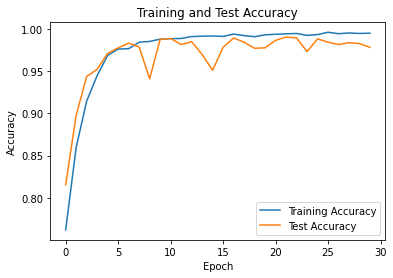

In [ ]:
# Plot training and test accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

57/57 [==============================] - 10s 180ms/step


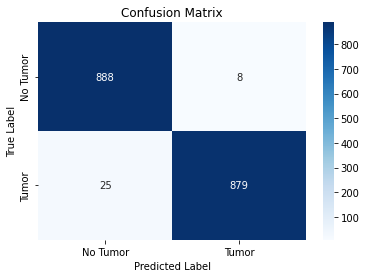

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate predictions for the test data
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

# Get the true labels for the test data
y_true = test_generator.classes

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Tumor', 'Tumor'], 
            yticklabels=['No Tumor', 'Tumor'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [ ]:
X_test, y_test = test_generator.next()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Get the predicted labels for the test data
y_pred = model.predict(X_test)

# Convert the predicted labels to binary values (0 or 1)
y_pred_binary = np.argmax(y_pred, axis=1)

# Calculate precision, recall, sensitivity, specificity, f1 score, and f beta score
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
sensitivity = recall
specificity = tn / (tn + fp)
f1_score = 2 * (precision * recall) / (precision + recall)
beta = 2
f_beta_score = (1 + beta ** 2) * (precision * recall) / (beta ** 2 * precision + recall)

# Print the metrics
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("Sensitivity: {:.4f}".format(sensitivity))
print("Specificity: {:.4f}".format(specificity))
print("F1 Score: {:.4f}".format(f1_score))
print("F Beta Score: {:.4f}".format(f_beta_score))


1/1 [==============================] - 0s 204ms/step
Precision: 0.9910
Recall: 0.9723
Sensitivity: 0.9723
Specificity: 0.9911
F1 Score: 0.9816
F Beta Score: 0.9760


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the test folder
test_data_dir = '/content/gdrive/MyDrive/MajorProject/br35hdataset/test'

test_datagen = ImageDataGenerator(
    rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 1800 images belonging to 2 classes.


In [9]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    confidence = round(100 * (np.max(predictions[0])), 2)
    
    return predicted_class, confidence


1/1 [==============================] - 0s 47ms/step


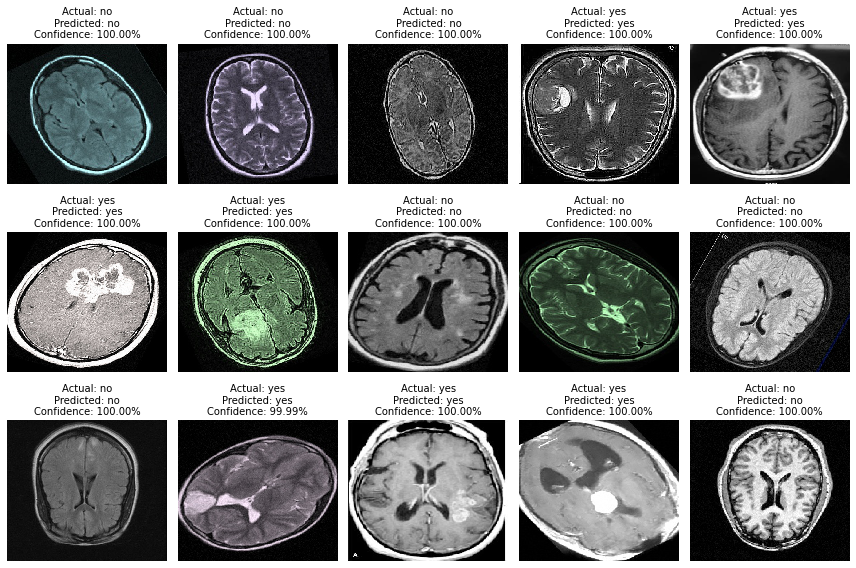

In [44]:
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import random

# Define the class names
class_names = ['no', 'yes']

# Get a list of all image file paths in the test folder
test_image_paths = []
for root, dirs, files in os.walk('/content/gdrive/MyDrive/MajorProject/br35hdataset/test'):
    for file in files:
        if file.endswith(".jpg"):
            test_image_paths.append(os.path.join(root, file))

# Randomly select 15 image file paths from the test folder
random.shuffle(test_image_paths)
test_image_paths = test_image_paths[:15]

# Load and preprocess the test images
test_images = []
actual_labels = []
for img_path in test_image_paths:
    img = Image.open(img_path).resize((256, 256))
    img_array = np.array(img).astype('float32') / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    test_images.append(img_array)
    actual_label = os.path.basename(os.path.dirname(img_path))
    actual_labels.append(actual_label)

# Create a grid of subplots to display the images and predicted labels
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(12, 8))
axs = axs.flatten()

# Make predictions for each image
for i, img_array in enumerate(test_images):
    # Get the predicted class and confidence
    predictions = model.predict(img_array)
    predicted_label = class_names[np.argmax(predictions[0])]
    confidence = predictions[0][np.argmax(predictions[0])] * 100
    
    # Display the image and predicted label
    axs[i].imshow(Image.open(test_image_paths[i]), interpolation='nearest', aspect='auto')
    axs[i].set_title(f"Actual: {actual_labels[i]}\nPredicted: {predicted_label}\nConfidence: {confidence:.2f}%", fontsize=10)
    axs[i].axis("off")

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 48ms/step


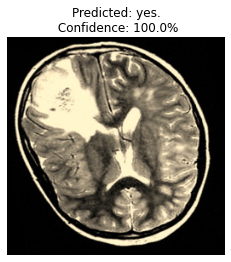

In [19]:
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the input image
input_image = Image.open("/content/gdrive/MyDrive/MajorProject/br35hdataset/test/yes/y_1000_0.jpg").resize((256,256))

class_names = ['no', 'yes']

# Convert the image to a numpy array
input_image_array = np.array(input_image)

# Normalize the image
input_image_array = input_image_array.astype('float32') / 255.0

# Add a batch dimension
input_image_array = np.expand_dims(input_image_array, axis=0)

# Make the prediction
predictions = model.predict(input_image_array)
# Make the prediction
predicted_class, confidence = predict(model, input_image_array[0])

# Get the predicted label
predicted_label = class_names[np.argmax(predictions[0])]

plt.figure()
plt.imshow(input_image)
# Print the predicted label
plt.title(f"Predicted: {predicted_label}.\n Confidence: {confidence}%")
plt.axis("off")
plt.show()